In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fresnel_propagation

In [2]:
grid_size = 50e-6
grid_dimension = 500
lambda_ = 2.75e-10
I0 = 1e6

## Simple case using a circle beam

In [50]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.RectAperture(20e-6, 20e-6, 0, F_in)

x = np.linspace(-25e-6, 25e-6, 500)
y = np.linspace(-25e-6, 25e-6, 500)
X,Y = np.meshgrid(x,y)

E_in = np.ones([500,500], dtype = np.complex128)
E_in [X<=-10e-6] = 0 +0j
E_in [X>=10e-6] = 0 +0j
E_in [Y<=-10e-6] = 0 +0j
E_in [Y>=10e-6] = 0 +0j

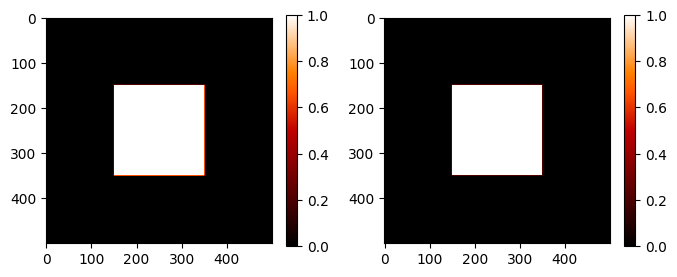

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [52]:
F_out = lp.Fresnel(F_in, 1)
E_out = fresnel_propagation(E_in, lambda_, 1, 0.1e-6)

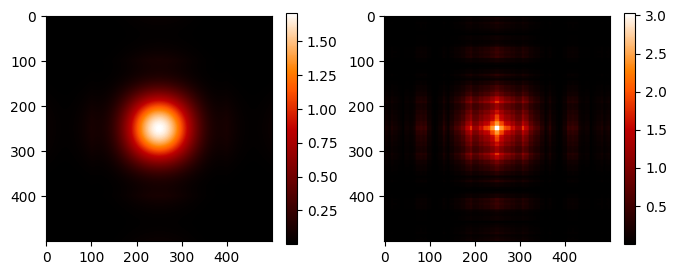

In [53]:
# phase plots
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

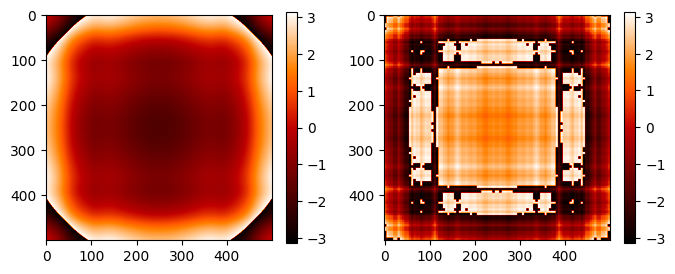

In [57]:
# phase plots
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='gist_heat')
im2=ax[1].imshow(np.angle(E_out), cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [55]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))
print("Custom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

LightPipes comparison:
in = 40401.0 | out = 32087.65628931982
Custom method:
in = 40000.0 | out = 39999.99999999999


## Simple case using a Gaussian beam

In [59]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.GaussAperture(F_in, 10e-6)
F_in.field = np.sqrt(I0) * F_in.field

x = np.linspace(-25e-6, 25e-6, 500)
y = np.linspace(-25e-6, 25e-6, 500)
X,Y = np.meshgrid(x,y)

E_in = np.sqrt(I0)*create_gaussian_mask(X, Y, diameter=20e-6)

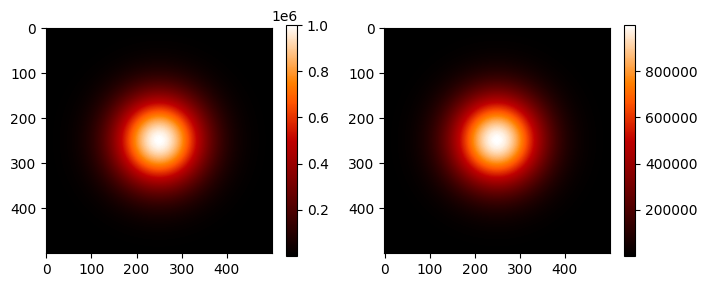

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

### Fresnel propagation

In [61]:
F_out = lp.Fresnel(F_in, 1)
E_out = fresnel_propagation(E_in, lambda_, 1, 0.1e-6)

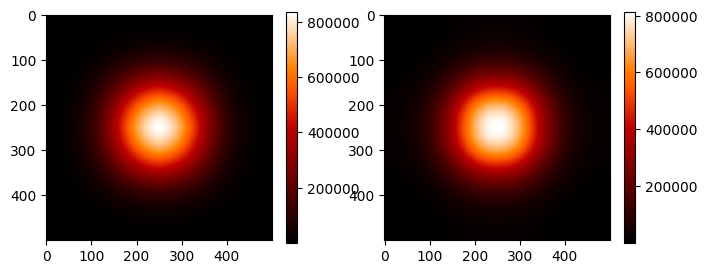

In [62]:
# intensity plots
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='gist_heat')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

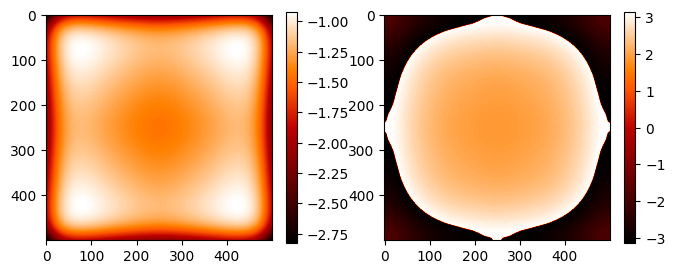

In [63]:
# phase plots
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.angle(F_out.field), cmap='gist_heat')
im2=ax[1].imshow(np.angle(E_out), cmap='gist_heat')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

In [64]:
# numerical comparison on number of photons

print("LightPipes comparison:")
print("in =", np.sum(np.abs(F_in.field)**2), "| out =", np.sum(np.abs(F_out.field)**2))
print("Custom method:")
print("in =", np.sum(np.abs(E_in)**2), "| out =", np.sum(np.abs(E_out)**2))

LightPipes comparison:
in = 31390356489.08713 | out = 30039209263.407055
Custom method:
in = 31265603287.02921 | out = 31265603287.029213


### Fraunhofer propagation